In [114]:
import numpy as np
import pandas as pd
import math
import sys, os
from tqdm import tqdm

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")

In [9]:
pd.set_option('display.max_columns', 500)
sys.path.append(os.path.realpath('..'))

In [4]:
train_df = pd.read_csv(r"..\data\train.csv", index_col=0)
test_df = pd.read_csv(r"..\data\test.csv", index_col=0)
sample_sub = pd.read_csv(r"..\data\sample_submission.csv", index_col=0)

# Missing Data

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing Data")
missing_data[missing_data['Total'] > 0]

Missing Data


,Total,Percent


# Explore Data

In [10]:
train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,-0.039758,0.153632,-0.061038,0.014330,0.067649,0.108643,0.013650,0.036815,-0.033927,-0.008302,0.009708,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,0.821889,0.976946,0.998470,1.039145,0.801335,0.891613,0.786654,0.691709,0.784454,0.739928,0.439521,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,-22.092656,-4.190145,-16.180165,-4.373778,-15.585021,-4.155728,-11.778839,-20.756768,-7.456060,-4.281628,-18.679066,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,-0.499563,-0.576969,-0.476890,-0.671601,-0.329905,-0.461596,-0.461077,-0.406675,-0.496990,-0.463035,-0.167927,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,-0.106034,0.090545,0.087649,-0.016837,0.049266,0.178975,0.054550,-0.013949,-0.039451,-0.002935,-0.037702,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,0.403967,0.917392,0.608480,0.695547,0.460837,0.791255,0.531777,0.410978,0.446448,0.455718,0.126750,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,15.878405,9.417789,5.406614,5.976265,6.078453,4.693323,5.834992,8.845303,4.847887,4.090974,15.407839,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219129 entries, 0 to 219128
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    219129 non-null  float64
 1   V1      219129 non-null  float64
 2   V2      219129 non-null  float64
 3   V3      219129 non-null  float64
 4   V4      219129 non-null  float64
 5   V5      219129 non-null  float64
 6   V6      219129 non-null  float64
 7   V7      219129 non-null  float64
 8   V8      219129 non-null  float64
 9   V9      219129 non-null  float64
 10  V10     219129 non-null  float64
 11  V11     219129 non-null  float64
 12  V12     219129 non-null  float64
 13  V13     219129 non-null  float64
 14  V14     219129 non-null  float64
 15  V15     219129 non-null  float64
 16  V16     219129 non-null  float64
 17  V17     219129 non-null  float64
 18  V18     219129 non-null  float64
 19  V19     219129 non-null  float64
 20  V20     219129 non-null  float64
 21  V21     21

In [12]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
target = ['Class']

# Charting

(-18.232645315736153, 18.4246610579788)

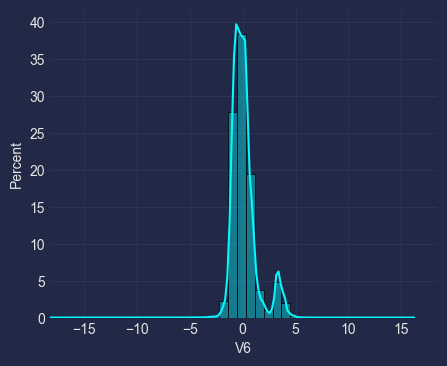

In [170]:
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':50
}


n_cols = 1
n_rows = 1
cell_with_dim = 5
cell_height_dim = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * cell_with_dim, n_rows * cell_height_dim))

sns.histplot(train_df[features[5]], label='Train X', color='#08F7FE', ax=ax, **histplot_hyperparams)
xlim = ax.get_xlim()
large_xlin_distance = abs(xlim[np.argmax(xlim)])
mean = train_df[features[0]].describe()['mean']
ax.set_xlim((mean-large_xlin_distance,mean+large_xlin_distance))


In [ ]:
n_cols = 2
n_rows = math.ceil(len(features) / n_cols)
cell_with_dim = 5
cell_height_dim = 4

histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':50
}

fig, ax = plt.subplots(n_rows, n_cols*2, figsize=(n_cols*2 * cell_with_dim, n_rows * cell_height_dim))

for a in ax[n_rows - 1, int(((n_rows - (len(features) / n_cols)) * n_cols*-1)):]:
    a.axis('off')

for i in tqdm(range(len(features))):
    row = math.ceil(i / n_cols) - 1
    col = (i % n_cols) 
    
    sources = [train_df, test_df]
    source_labels = ['Train', 'Test']
    color_sets = [['#08F7FE','#FE53BB'], ['#FE53BB','#08F7FE']]
    
    for s, source in enumerate(sources):
        c1 = color_sets[s][0]
        c2 = color_sets[s][1]
        bp = ax[row, col].boxplot(x=source[features[i]], sym='k+', positions=[s], patch_artist=True, labels=[source_labels[s]], widths=cell_with_dim / (cell_with_dim + 2))

        ax[row, col].set_title(features[i])
        for box in bp['boxes']:
            box.set(color=c1, linewidth=1)
            box.set(facecolor=c1)
            r, g, b, a = box.get_facecolor()
            box.set_facecolor((r, g, b, .4)) # alpha layer
        for whisker in bp['whiskers']:
            whisker.set(color=c1, linewidth=1)
        for cap in bp['caps']:
            cap.set(color=c1, linewidth=1)
        for median in bp['medians']:
            median.set(color=c2)
        for flier in bp['fliers']:
            flier.set(color=c1, linewidth=1)
            flier.set(markeredgecolor=c1)
            
        
    sns.histplot(train_df[features[i]], label='Train X', color=c1, ax=ax[row, col + 2], **histplot_hyperparams)
    sns.histplot(test_df[features[i]], label='Test X', color=c2, ax=ax[row, col + 2], **histplot_hyperparams)
    ax[row, col + 2].set_title(features[i])
    xlim = ax[row, col + 2].get_xlim()
    large_xlin_distance = abs(xlim[np.argmax(xlim)])
    mean = train_df[features[i]].describe()['mean']
    ax[row, col + 2].set_xlim((mean-large_xlin_distance,mean+large_xlin_distance))
        
    mplcyberpunk.make_lines_glow(ax[row, col])
    mplcyberpunk.make_lines_glow(ax[row, col + 2])

 21%|█████████████████▏                                                                 | 6/29 [00:15<01:00,  2.62s/it]

In [117]:
bp

'Train'

In [149]:
mplcyberpunk.cyberpunk_stylesheets['cyberpunk']['axes.prop_cycle']

'#08F7FE'
'#FE53BB'
'#F5D300'
'#00ff41'
'r'
'#9467bd'


In [67]:
ax[0,0].box.__dict__

AttributeError: 'AxesSubplot' object has no attribute 'box'